In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

In [2]:
!git clone 'https://github.com/Chinmaybharadwaj7/Sample-Dataset'

fatal: destination path 'Sample-Dataset' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('/content/Sample-Dataset/Titanic-Dataset.csv')

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#values that the column holds
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

#Describes the dataset(Only numerical Column)
#Calculates the basic statistics for dataset study

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [11]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


Step 3: Data Cleaning

In [12]:
#first we need to figure the cells which are not filled i.e. Empty
# True if Empty(Null)

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#total count of unknown value(null) in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
#filling the empty column of 'Age' column with Median value of the same column
#Wll use Median for Numerical columns
#Median = Midlle Value of that column
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [15]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
#filling the empty column of 'Embarked' column with Mode of the same column
#Wll use Mode for Numerical columns
#Mode = value occured very often i.e. most frequent value

mode_embarked = df['Embarked'].mode()
mode_embarked

,Embarked
0,S


In [17]:
mode_embarked = df['Embarked'].mode()[0]
mode_embarked

'S'

In [18]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Mode = most frequent value

Median = middle value

Mean = average value

In [20]:
#Filling the 'Cabin' column
# Will fill 1 for cells with cabin value given, and 0 for empty

df['Has_Cabin'] = df['Cabin'].notna().astype(int)
#Creating a new column 'Has_cabin' with returned values as boolean. True if has value and False if not.
#astype() -> Converts boolean to int

df.drop('Cabin',axis = 1,inplace = True) #Deleteng the column 'Cabin' which is not required further more

In [21]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [23]:
df['Has_Cabin'].value_counts()

,count
Has_Cabin,
0,687
1,204


Analysis

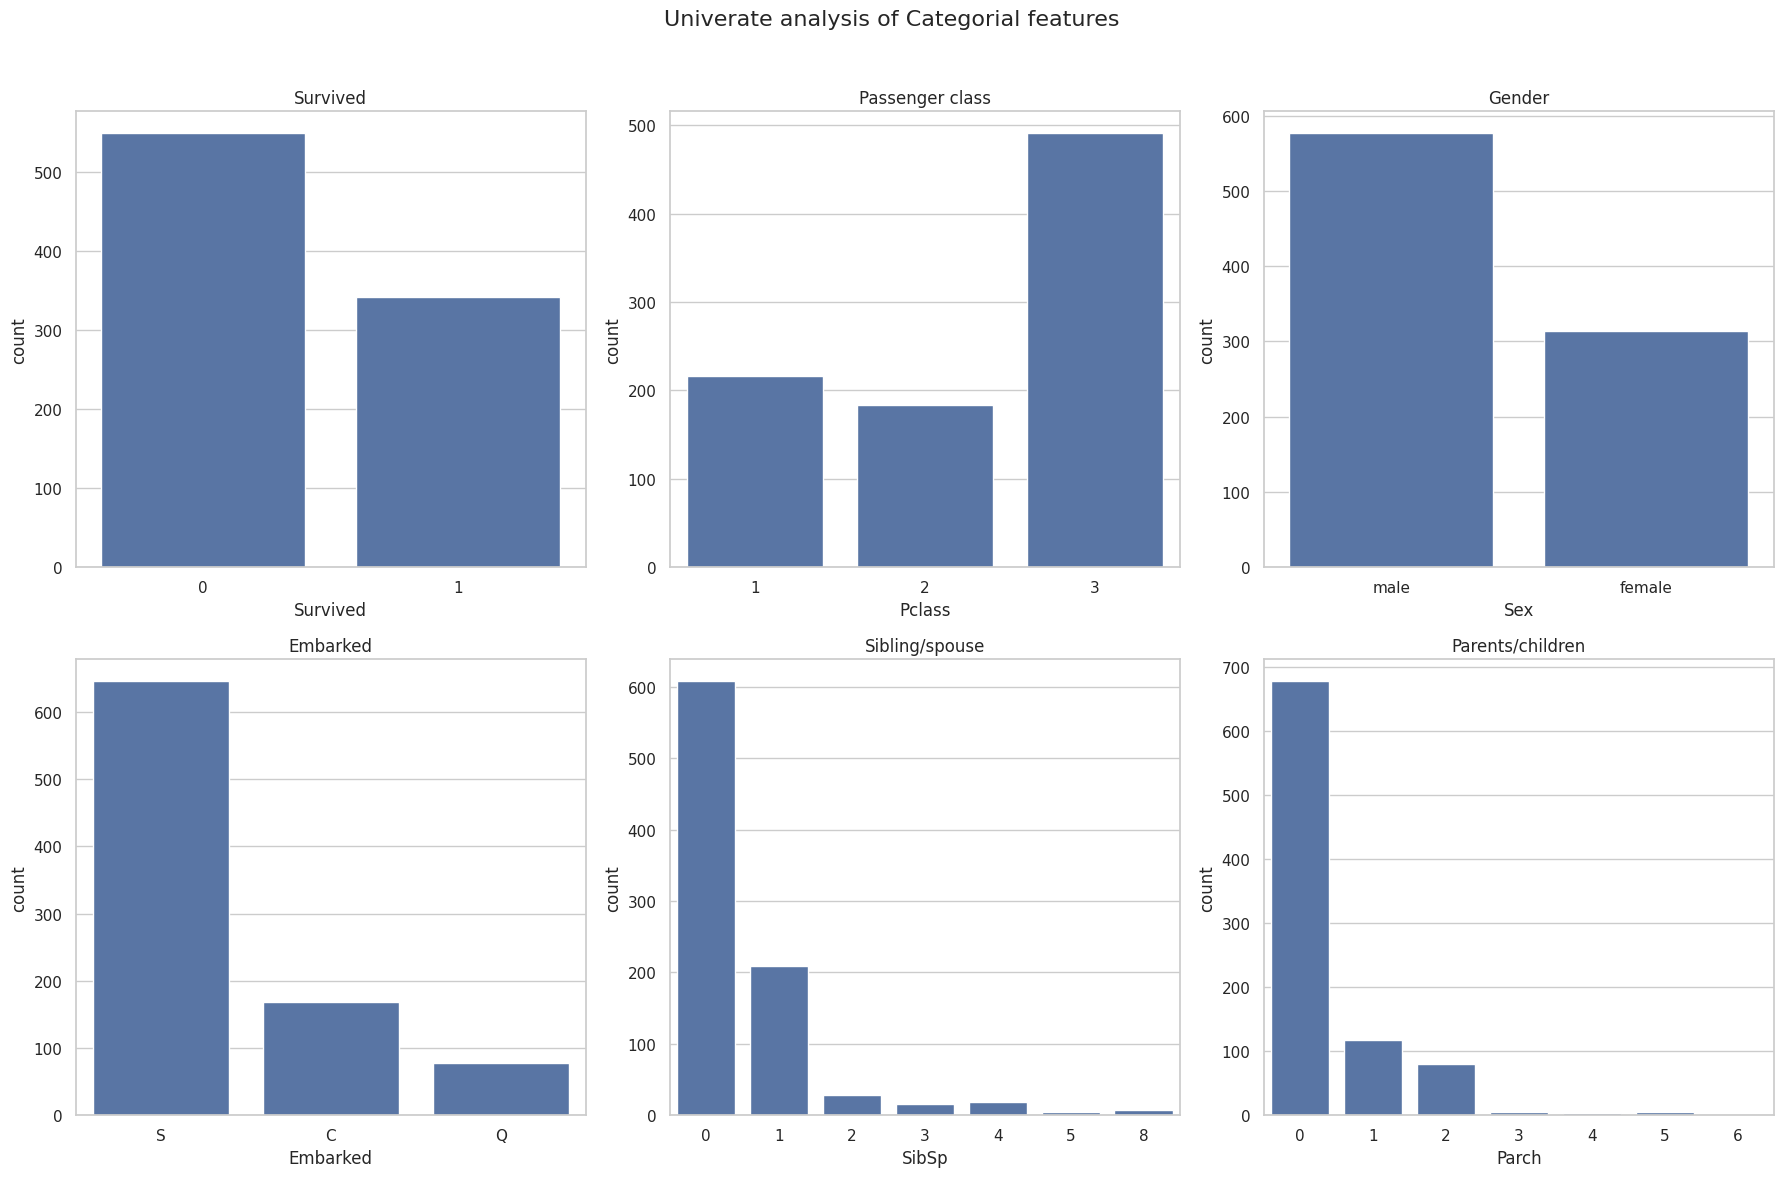

In [31]:
##Setup up the figure for plotting
fig, axes = plt.subplots(2,3,figsize = (18,12))
fig.suptitle('Univerate analysis of Categorial features',fontsize = 16)

#plotting the each categorical column
sns.countplot(ax=axes[0,0],x = 'Survived', data = df).set_title('Survived')
sns.countplot(ax=axes[0,1],x = 'Pclass', data = df).set_title('Passenger class')
sns.countplot(ax=axes[0,2],x = 'Sex', data = df).set_title('Gender')
sns.countplot(ax=axes[1,0],x = 'Embarked', data = df).set_title('Embarked')
sns.countplot(ax=axes[1,1],x = 'SibSp', data = df).set_title('Sibling/spouse')
sns.countplot(ax=axes[1,2],x = 'Parch', data = df).set_title('Parents/children')

plt.tight_layout(rect =[0,0,1,0.96])
plt.show()

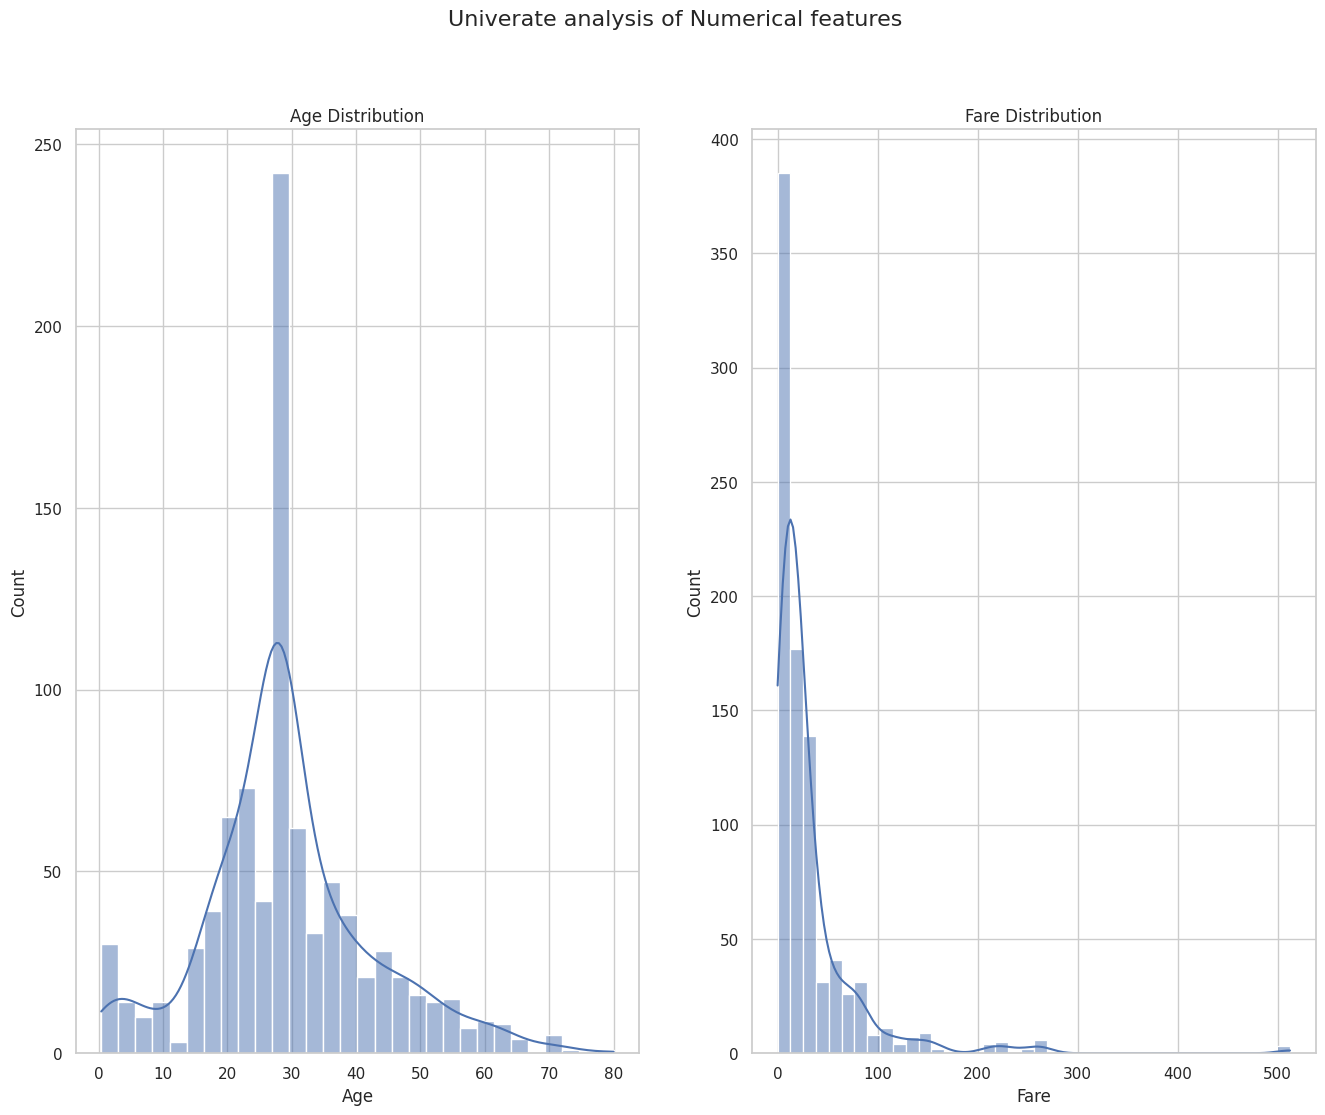

In [40]:
fig, axes = plt.subplots(1,2,figsize = (16,12))
fig.suptitle('Univerate analysis of Numerical features',fontsize = 16)

sns.histplot(ax = axes[0],data = df, x ='Age',kde = True, bins =30).set_title('Age Distribution')
sns.histplot(ax = axes[1],data = df, x ='Fare',kde = True, bins =40).set_title('Fare Distribution')

plt.show()

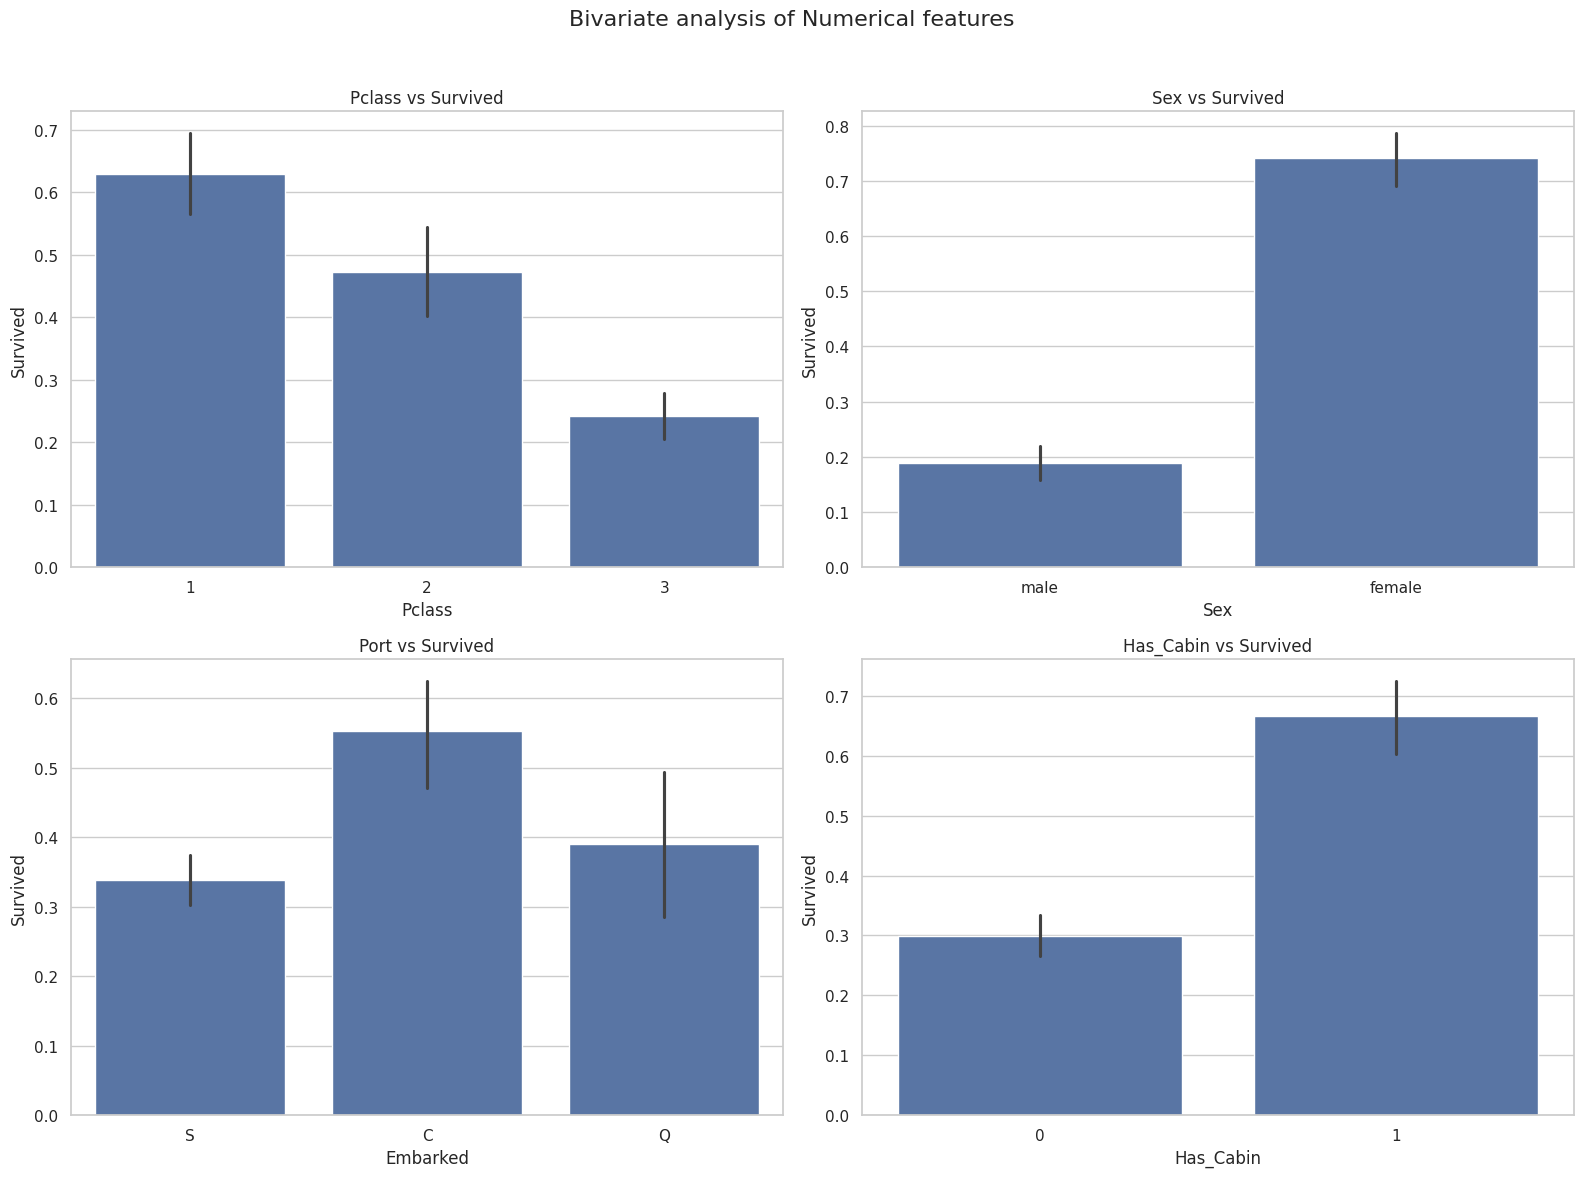

In [43]:
fig, axes = plt.subplots(2,2,figsize = (16,12))
fig.suptitle('Bivariate analysis of Numerical features',fontsize = 16)

#Pclass vs Survived
sns.barplot(ax= axes[0,0], x = 'Pclass', y ='Survived', data = df).set_title('Pclass vs Survived')

#Sex vs Survived
sns.barplot(ax= axes[0,1], x = 'Sex', y ='Survived', data = df).set_title('Sex vs Survived')

#Embarked vs Survived
sns.barplot(ax= axes[1,0], x = 'Embarked', y ='Survived', data = df).set_title('Port vs Survived')

#Has_cabin vs Survived
sns.barplot(ax= axes[1,1], x = 'Has_Cabin', y ='Survived', data = df).set_title('Has_Cabin vs Survived')

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()